In this notebook we will explore our intiail dataset. The dataset contains data about coral coverage in two different main locations over multiple decades.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

In [5]:
df = pd.read_csv("coral_dataset.csv") #read in the dataset

In [6]:
df #print and look at the data set 

,Date,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB
0,1987/12/01,Tektite,1,T1Q1,16.5,3.5,6
1,1987/12/01,Tektite,1,T1Q2,10,6,74
2,1987/12/01,Tektite,1,T1Q3,13.5,3.5,45
3,1987/12/01,Tektite,1,T1Q4,15.5,6.5,61.5
4,1987/12/01,Tektite,1,T1Q5,19,4,48
...,...,...,...,...,...,...,...
2278,2021/07/01,Yawzi,nd,6,0.0,30.0,50.0
2279,2021/07/01,Yawzi,nd,7,0.0,28.5,45.5
2280,2021/07/01,Yawzi,nd,8,0.5,35.0,35.0
2281,2021/07/01,Yawzi,nd,9,0.5,42.0,42.5


In [7]:
print(df['percentCover_CTB'].unique()) #check the unique values of the column

['6' '74' '45' '61.5' '48' '10' '3' '29' '38' '30.5' '31.5' '26' '24'
 '11.5' '14.5' '19' '15.5' '22' '16' '19.3' '31' '39' '30' '19.5' '20.5'
 '44.5' '63' '39.5' '46' '62' '6.8' '38.5' '32.5' '21' '36.5' '25.5'
 '10.5' '18' '12.5' '24.5' '32' '14' '25' '33.5' '40.5' '29.8' '33' '41'
 '9' '34.5' '23' '27.5' '29.5' '7.5' '7' '26.5' '22.5' '16.5' '12' '17'
 '16.1' '17.5' '35.5' '50' '37.5' '27' '18.5' '9.5' '37' '41.5' '51'
 '49.5' '20' '42.5' '21.5' '43.5' '40' '28.5' '28' '23.5' '6.5' '15' '11'
 '34' '8.5' '8' '13' '13.5' '36' '30.3' '32.3' '25.6' '30.9' '17.2' '28.8'
 '5.3' '15.1' '15.6' '25.9' '22.6' '8.9' '10.3' '7.6' '8.7' '8.8' '7.3'
 '5.6' '0' '1.6' '25.3' '40.7' '3.2' '4.5' '2.5' '3.5' '5' '18.7' '18.8'
 '20.8' '8.1' '2.6' '12.3' '14.9' '14.1' '2.7' '15.9' '12.8' '15.7' '6.6'
 '13.8' '1.1' '2.2' '33.2' '23.7' '31.4' '26.2' '1' '7.4' '18.6' '4' '1.5'
 '5.5' '22.3' '11.1' '12.2' '11.2' '24.7' '8.2' '4.1' '7.7' '14.3' '9.7'
 '10.2' '10.7' '5.1' '22.7' '17.9' '2' '9.9' '36.2' '30.8'

In [8]:
print(len(df)) #print the amount of rows of the dataset
#check and print the amount of times there is no data given in the entry for our three main columns
specific_value_count = df['percentCover_CTB'].value_counts()['nd']
print(specific_value_count)
specific_value_count = df['percentCover_macroalgae'].value_counts()['nd']
print(specific_value_count)
specific_value_count = df['percentCover_allCoral'].value_counts()['nd']
print(specific_value_count)


2283
19
19
9


Based on the previous numbers we can drop all of the rows who have "nd" as the value in our main three columns without losing a bunch of data. 

In [9]:
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
print(len(df))

2264


In [10]:
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral

In [11]:
df #print the dataset with the new feature

,Date,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
0,1987/12/01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1,1987/12/01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200
2,1987/12/01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515
3,1987/12/01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320
4,1987/12/01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480
...,...,...,...,...,...,...,...,...
2278,2021/07/01,Yawzi,nd,6,0.000,0.300,0.500,0.200
2279,2021/07/01,Yawzi,nd,7,0.000,0.285,0.455,0.260
2280,2021/07/01,Yawzi,nd,8,0.005,0.350,0.350,0.300
2281,2021/07/01,Yawzi,nd,9,0.005,0.420,0.425,0.155


In [12]:
# convert the date column to date time objects
df.index = pd.to_datetime(df.index)

In [13]:
explore_df = df[df['site'] == 'Tektite']
explore_df = explore_df[explore_df['quadrat'] == 'T1Q1']
percent_cover_all_coral = np.array(explore_df['percentCover_allCoral'])

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv, norm

In [15]:

class KalmanFilter(object):
    def __init__(self,F,Q,H,R,u):
        """
        Initialize the dynamical system models.
        
        Parameters
        ----------
        F : ndarray of shape (n,n)
            The state transition model.
        Q : ndarray of shape (n,n)
            The covariance matrix for the state noise.
        H : ndarray of shape (m,n)
            The observation model.
        R : ndarray of shape (m,m)
            The covariance matrix for observation noise.
        u : ndarray of shape (n,)
            The control vector.
        """
        #save attributes
        self.F=F
        self.Q=Q
        self.H=H
        self.R=R
        self.u=u
    
    def evolve(self,x0,N):
        """
        Compute the first N states and observations generated by the Kalman system.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state.
        N : integer
            The number of time steps to evolve.

        Returns
        -------
        states : ndarray of shape (n,N)
            The i-th column gives the i-th state.
        obs : ndarray of shape (m,N)
            The i-th column gives the i-th observation.
        """
        #initialize states matrix
        n=len(x0)
        m=len(self.H@x0)
        states=np.zeros((n,N))
        states[:,0]=x0
        obs=np.zeros((m,N))
        obs[:,0]=self.H@(states[:,0])
        for i in range(1,N):
            #get noise
            w=np.random.multivariate_normal(np.zeros_like(states[:,0]), self.Q)
            v=np.random.multivariate_normal(np.zeros_like(obs[:,0]), self.R)
            #update states
            states[:,i]=self.F@states[:,i-1]+self.u+w
            #update obs
            obs[:,i]=self.H@states[:,i]+v
        return states, obs

    def estimate(self,x0,P0,z, return_norms = False):
        """
        Compute the state estimates using the kalman filter.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state estimate.
        P0 : ndarray of shape (n,n)
            The initial error covariance matrix.
        z : ndarray of shape(m,N)
            Sequence of N observations (each column is an observation).

        Returns
        -------
        out : ndarray of shape (n,N)
            Sequence of state estimates (each column is an estimate).
        """
        #initialize states matrix
        n=len(x0)
        m,N=z.shape
        states=np.zeros((n,N))
        P=P0
        states[:,0]=x0
        #iterate to get states
        for i in range(1,N):
            #predict phase
            xkk1=self.F@states[:,i-1]+self.u
            Pkk1=self.F@P@self.F.T+self.Q
            #update step
            y=z[:,i]-self.H@xkk1
            S=self.H@Pkk1@self.H.T+self.R
            K=Pkk1@self.H.T@inv(S)
            states[:,i]=xkk1+K@y
            P=(np.eye(n)-K@self.H)@P
        return states
            
    
    def predict(self,x,k):
        """
        Predict the next k states in the absence of observations.

        Parameters
        ----------
        x : ndarray of shape (n,)
            The current state estimate.
        k : integer
            The number of states to predict.

        Returns
        -------
        out : ndarray of shape (n,k)
            The next k predicted states.
        """
        #initialize states matrix
        n=len(x)
        states=np.zeros((n,k))
        states[:,0]=self.F@x+self.u
        #iterate to get k next steps
        for i in range(1,k):
            states[:,i]=self.F@states[:,i-1]+self.u
        return states
    
    def rewind(self,x,k):
        """
        Predict the states from time 0 through k-1 in the absence of observations.
    
        Parameters
        ----------
        x : ndarray of shape (n,)
            The state estimate at time k.
        k : integer
            The current time step.
    
        Returns
        -------
        out : ndarray of shape (n,k)
            The predicted states from time 0 up through k-1 (in that order).
        """
        #get F^-1
        Finv=inv(self.F)
        n=len(x)
        states=np.zeros((n,k))
        #get most previous step
        states[:,-1]=Finv@(x-self.u)
        #iterate to get k steps
        for i in range(k-2,-1,-1):
            states[:,i]=Finv@(states[:,i+1]-self.u)
        return states


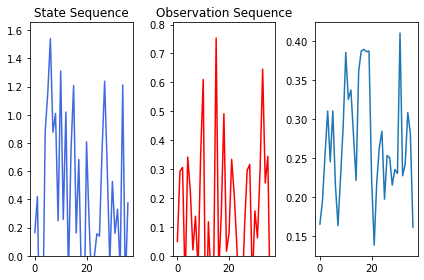

In [32]:
F=np.linspace(.1,1,10)
Q=np.linspace(0.1,1,10)
H=np.linspace(0.1,1,10)
R=np.linspace(0.1,1,10)
best_mse=np.inf
for f in F:
    for q in Q:
        for h in H:
            for r in R:
                kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
                states, obs= kf.evolve([percent_cover_all_coral[0]], 37)
                mse = np.mean((np.array(obs) - percent_cover_all_coral)**2)
                if mse < best_mse:
                    best_mse = mse
                    best_params = (f,q,h,r)
                    beststates=states
                    bestobs=obs
                #get observations and states

#plot states
plt.subplot(131)
plt.plot(beststates[0], 'royalblue')
plt.ylim(0,)
plt.title('State Sequence')
#plot observations
plt.subplot(132)
plt.title('Observation Sequence')
plt.plot(bestobs[0], 'r')
plt.ylim(0,)
plt.subplot(133)
plt.plot(percent_cover_all_coral)
plt.tight_layout()
plt.show()

0.0733634185788133
(0.4, 0.4, 0.30000000000000004, 0.1)


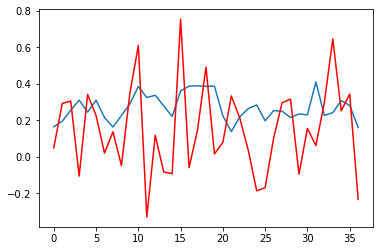

In [36]:
print(best_mse)
print(best_params)
plt.plot(percent_cover_all_coral)
plt.plot(bestobs[0], 'r')

In [37]:
F=np.linspace(.1,5,20)
Q=np.linspace(0.01,0.1,2)
H=np.linspace(0.1,5,20)
R=np.linspace(0.01,.10,2)
best_mse=np.inf
for f in F:
    for q in Q:
        for h in H:
            for r in R:
                kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
                states, obs= kf.evolve([percent_cover_all_coral[0]], 37)
                mse = np.mean((np.array(obs) - percent_cover_all_coral)**2)
                if mse < best_mse:
                    best_mse = mse
                    best_params = (f,q,h,r)
                    beststates=states
                    bestobs=obs
                #get observations and states

#plot states
plt.subplot(131)
plt.plot(beststates[0], 'royalblue')
plt.ylim(0,)
plt.title('State Sequence')
#plot observations
plt.subplot(132)
plt.title('Observation Sequence')
plt.plot(bestobs[0], 'r')
plt.ylim(0,)
plt.subplot(133)
plt.plot(percent_cover_all_coral)
plt.tight_layout()
plt.show()
print(best_mse)
print(best_params)

KeyboardInterrupt: 

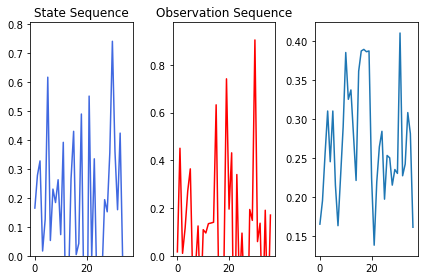

0.11950323797939623
(0.1, 0.1, 0.1, 0.1)


In [38]:

#plot states
plt.subplot(131)
plt.plot(beststates[0], 'royalblue')
plt.ylim(0,)
plt.title('State Sequence')
#plot observations
plt.subplot(132)
plt.title('Observation Sequence')
plt.plot(bestobs[0], 'r')
plt.ylim(0,)
plt.subplot(133)
plt.plot(percent_cover_all_coral)
plt.tight_layout()
plt.show()
print(best_mse)
print(best_params)

0.11950323797939623
(0.1, 0.1, 0.1, 0.1)


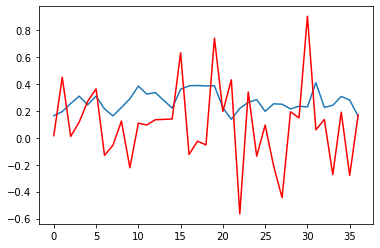

In [39]:
print(best_mse)
print(best_params)
plt.plot(percent_cover_all_coral)
plt.plot(bestobs[0], 'r')

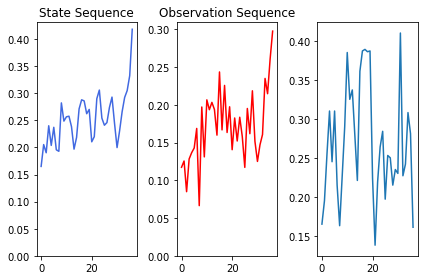

0.015458184742138609
(1.0157894736842106, 0.001, 0.7105263157894737, 0.001)


In [42]:
F=np.linspace(.1,3,20)
Q=np.linspace(0.001,0.01,2)
H=np.linspace(0.1,3,20)
R=np.linspace(0.001,.01,2)
best_mse=np.inf
for f in F:
    for q in Q:
        for h in H:
            for r in R:
                kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
                states, obs= kf.evolve([percent_cover_all_coral[0]], 37)
                mse = np.mean((np.array(obs) - percent_cover_all_coral)**2)
                if mse < best_mse:
                    best_mse = mse
                    best_params = (f,q,h,r)
                    beststates=states
                    bestobs=obs
                #get observations and states

#plot states
plt.subplot(131)
plt.plot(beststates[0], 'royalblue')
plt.ylim(0,)
plt.title('State Sequence')
#plot observations
plt.subplot(132)
plt.title('Observation Sequence')
plt.plot(bestobs[0], 'r')
plt.ylim(0,)
plt.subplot(133)
plt.plot(percent_cover_all_coral)
plt.tight_layout()
plt.show()
print(best_mse)
print(best_params)

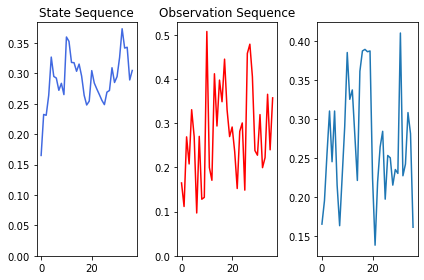

0.010713089765423574
(0.9999999999999999, 0.001, 0.9999999999999999, 0.01)


In [43]:
F=np.linspace(.1,2,20)
Q=np.linspace(0.001,0.01,2)
H=np.linspace(0.1,2,20)
R=np.linspace(0.001,.01,2)
best_mse=np.inf
for f in F:
    for q in Q:
        for h in H:
            for r in R:
                kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
                states, obs= kf.evolve([percent_cover_all_coral[0]], 37)
                mse = np.mean((np.array(obs) - percent_cover_all_coral)**2)
                if mse < best_mse:
                    best_mse = mse
                    best_params = (f,q,h,r)
                    beststates=states
                    bestobs=obs
                #get observations and states

#plot states
plt.subplot(131)
plt.plot(beststates[0], 'royalblue')
plt.ylim(0,)
plt.title('State Sequence')
#plot observations
plt.subplot(132)
plt.title('Observation Sequence')
plt.plot(bestobs[0], 'r')
plt.ylim(0,)
plt.subplot(133)
plt.plot(percent_cover_all_coral)
plt.tight_layout()
plt.show()
print(best_mse)
print(best_params)

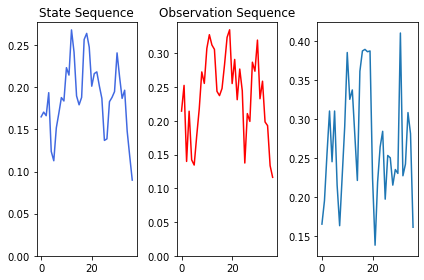

0.006960050889997335
(0.9999999999999999, 0.001, 1.3, 0.001)


In [45]:
F=np.linspace(.1,2,20)
Q=np.linspace(0.001,0.01,2)
H=np.linspace(0.1,2,20)
R=np.linspace(0.001,.01,2)
best_mse=np.inf
for f in F:
    for q in Q:
        for h in H:
            for r in R:
                kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
                states, obs= kf.evolve([percent_cover_all_coral[0]], 37)
                mse = np.mean((np.array(obs) - percent_cover_all_coral)**2)
                if mse < best_mse:
                    best_mse = mse
                    best_params = (f,q,h,r)
                    beststates=states
                    bestobs=obs
                #get observations and states

#plot states
plt.subplot(131)
plt.plot(beststates[0], 'royalblue')
plt.ylim(0,)
plt.title('State Sequence')
#plot observations
plt.subplot(132)
plt.title('Observation Sequence')
plt.plot(bestobs[0], 'r')
plt.ylim(0,)
plt.subplot(133)
plt.plot(percent_cover_all_coral)
plt.tight_layout()
plt.show()
print(best_mse)
print(best_params)

0.006960050889997335
(0.9999999999999999, 0.001, 1.3, 0.001)


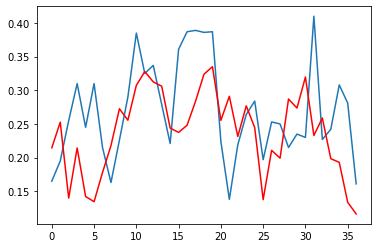

In [46]:
print(best_mse)
print(best_params)
plt.plot(percent_cover_all_coral)
plt.plot(bestobs[0], 'r')

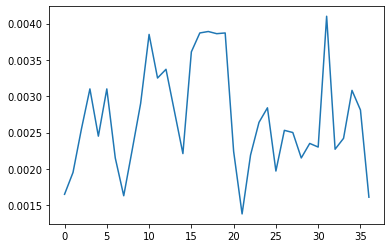

In [23]:
plt.plot(percent_cover_all_coral)

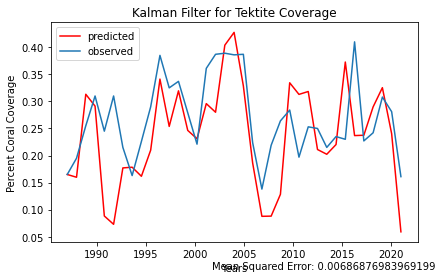

In [13]:
f,q,h,r=1,.01,1,.001
mse=np.inf
for _ in range(10000):
    kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
    states, obs= kf.evolve([percent_cover_all_coral[0]], 37)
    if np.mean((np.array(obs) - percent_cover_all_coral)**2) < mse:
        mse = np.mean((np.array(obs) - percent_cover_all_coral)**2)
        bestobs=obs
plt.ylabel('Percent Coral Coverage')
new_time = np.linspace(1987,2021,len(percent_cover_all_coral))
plt.xlabel(f"Year")
plt.figtext(.05, .5, f'Mean Squared Error: {mse}',)
plt.title("Kalman Filter for Tektite Coverage", ha='center')
plt.plot(new_time, bestobs[0], color='red', label='predicted')
plt.plot(new_time, percent_cover_all_coral, label='observed')
plt.legend()
plt.tight_layout()


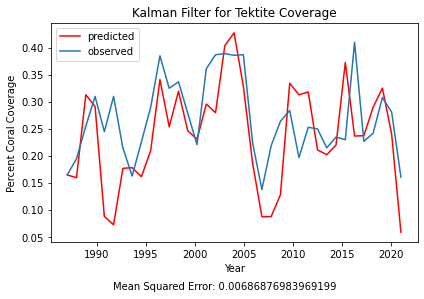

In [25]:
plt.ylabel('Percent Coral Coverage')
new_time = np.linspace(1987,2021,len(percent_cover_all_coral))
plt.xlabel(f"Year")
plt.figtext(.27, -0.02, f'Mean Squared Error: {mse}',)
plt.title("Kalman Filter for Tektite Coverage", ha='center')
plt.plot(new_time, bestobs[0], color='red', label='predicted')
plt.plot(new_time, percent_cover_all_coral, label='observed')
plt.legend()
plt.tight_layout()

In [26]:
explore_df = df[df['site'] == 'Yawzi']
explore_df = explore_df[explore_df['quadrat'] == 'T1Q1']
percent_cover_all_coral2 = np.array(explore_df['percentCover_allCoral'])

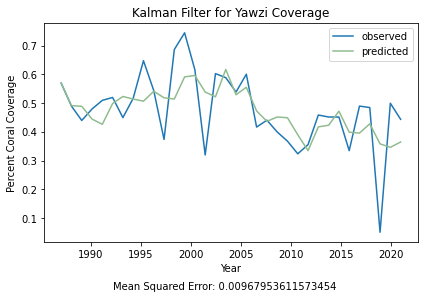

In [30]:
f,q,h,r=1,.001,1,.001
mse=np.inf
for _ in range(10000):
    kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
    states, obs= kf.evolve([percent_cover_all_coral2[0]], 34)
    if np.mean((np.array(obs) - percent_cover_all_coral2)**2) < mse:
        mse = np.mean((np.array(obs) - percent_cover_all_coral2)**2)
        bestobs=obs
plt.ylabel('Percent Coral Coverage')
new_time = np.linspace(1987,2021,len(percent_cover_all_coral2))
plt.xlabel(f"Year")
plt.figtext(.27, -0.02, f'Mean Squared Error: {mse}',)
plt.title("Kalman Filter for Yawzi Coverage", ha='center')
plt.plot(new_time, percent_cover_all_coral2, label='observed')
plt.plot(new_time, bestobs[0], color='darkseagreen', label='predicted')
plt.legend()
plt.tight_layout()


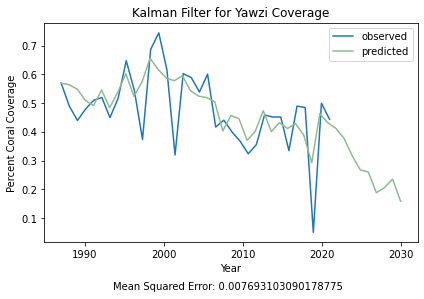

In [35]:
f,q,h,r=1,.001,1,.001
mse=np.inf
for _ in range(10000):
    kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
    states, obs= kf.evolve([percent_cover_all_coral2[0]], 43)
    if np.mean((np.array(obs[0][:34]) - percent_cover_all_coral2)**2) < mse:
        mse = np.mean((np.array(obs[0][:34]) - percent_cover_all_coral2)**2)
        bestobs=obs
plt.ylabel('Percent Coral Coverage')
new_time = np.linspace(1987,2021,len(percent_cover_all_coral2))
new_time2 = np.linspace(1987,2030,len(bestobs[0]))
plt.xlabel(f"Year")
#plt.figtext(.27, -0.02, f'Mean Squared Error: {mse}',)
plt.title("Kalman Filter Prediction for Yawzi Coverage", ha='center')
plt.plot(new_time, percent_cover_all_coral2, label='observed')
plt.plot(new_time2, bestobs[0], color='darkseagreen', label='predicted')
plt.legend()
plt.tight_layout()


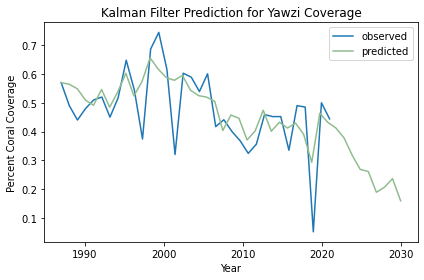

In [36]:
plt.ylabel('Percent Coral Coverage')
new_time = np.linspace(1987,2021,len(percent_cover_all_coral2))
new_time2 = np.linspace(1987,2030,len(bestobs[0]))
plt.xlabel(f"Year")
#plt.figtext(.27, -0.02, f'Mean Squared Error: {mse}',)
plt.title("Kalman Filter Prediction for Yawzi Coverage", ha='center')
plt.plot(new_time, percent_cover_all_coral2, label='observed')
plt.plot(new_time2, bestobs[0], color='darkseagreen', label='predicted')
plt.legend()
plt.tight_layout()

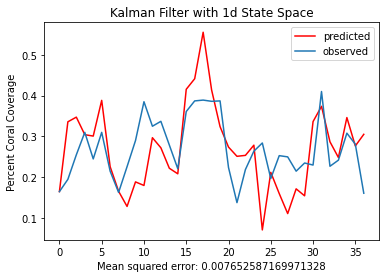

In [87]:
f,q,h,r=1,.01,1,.001
mse=np.inf
for _ in range(10000):
    kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
    states, obs= kf.evolve([percent_cover_all_coral[0]], 37)
    if np.mean((np.array(obs) - percent_cover_all_coral)**2) < mse:
        mse = np.mean((np.array(obs) - percent_cover_all_coral)**2)
        bestobs=obs
plt.ylabel('Percent Coral Coverage')
plt.xlabel(f"Mean squared error: {mse}")
plt.title("Kalman Filter with 1d State Space")
plt.plot(bestobs[0], color='red', label='predicted')
plt.plot(percent_cover_all_coral, label='observed')
plt.legend()


Mean squared error:  0.009015038505220722


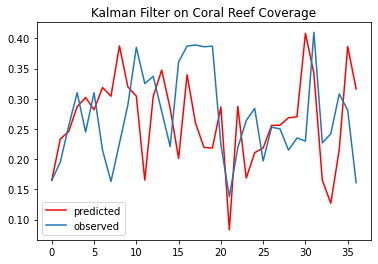

In [142]:
f,q,h,r=1,.01,1,.001
mse=np.inf
for _ in range(10000):
    kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
    states, obs= kf.evolve([percent_cover_all_coral[0]], 37)
    if np.mean((np.array(obs) - percent_cover_all_coral)**2) < mse:
        mse = np.mean((np.array(obs) - percent_cover_all_coral)**2)
        bestobs=obs
print("Mean squared error: ", mse)
plt.title("Kalman Filter on Coral Reef Coverage")
plt.plot(bestobs[0], color='red', label='predicted')
plt.plot(percent_cover_all_coral, label='observed')
plt.legend()


0.006960050889997335
(0.9999999999999999, 0.001, 1.3, 0.001)


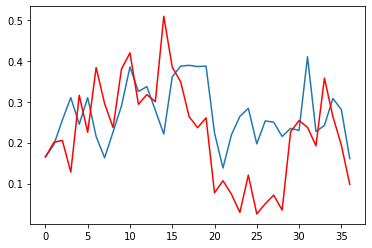

In [73]:
print(best_mse)
print(best_params)
plt.plot(percent_cover_all_coral)
plt.plot(bestobs[0], 'r')

In [85]:
data = pd.read_csv("L_O_seawater_temp.csv", index_col = "Date")
data.sort_index(inplace = True)
data = data[1:]
temp_data = data[data['Temp'] != 'nd'].astype(float)
temp_data.index = pd.to_datetime(temp_data.index)
temp_data['year'] = temp_data.index.year
year_means = temp_data.groupby(['year']).mean()

In [81]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral
df.index = pd.to_datetime(df.index)
df['year_column'] = df.index.year

df_tektite = df[df['site']=='Tektite']
avg_percent_cover_allcoral_tektite = df_tektite.groupby('year_column')['percentCover_allCoral'].mean()

z = np.diff(avg_percent_cover_allcoral_tektite)
comb_data = pd.concat([avg_percent_cover_allcoral_tektite,year_means],axis = 1)
comb_data.dropna()

,percentCover_allCoral,Temp
1996,0.389194,27.339891
1997,0.416667,27.809000
1998,0.433767,28.170959
1999,0.434800,27.992055
2000,0.430900,27.482548
2001,0.437833,27.724932
2002,0.487633,27.690411
2003,0.470833,27.987569
2004,0.407567,27.749444
2005,0.419700,28.211978


In [3]:
x=comb_data.iloc[19, [0,1]].values
obs=comb_data.iloc[19:35,[0]].values
mse=np.inf
for i in range(-10,10):
    for j in range(-10,10):
        for k in range(-10, 10):
            for l in range(-10,10):
                for m in range(-10,10):
                    F, H = np.array([[1+i/20,1+j/20],[1+m/20, 1+l/20]]), np.array([[1-k/30,k/30],[k/30,1-k/30]])
                    Q, R = np.eye(2), np.eye(2)
                    kf=KalmanFilter(F, Q, H, R, np.zeros(2))
                    states=kf.predict(x, 16)
                    plt.plot(states[0])
                    if np.mean((obs - states[0])**2) < mse:
                        mse = np.mean((obs - states[0])**2)
                        beststates=states
                        print(mse)
                    print(i,j,k,l,m)
plt.plot(obs)
plt.show()
plt.plot(beststates[0])
plt.plot(obs)


NameError: name 'comb_data' is not defined

In [1]:
plt.plot(obs)
plt.show()
plt.plot(beststates[0])
plt.plot(obs)
plt.show()

NameError: name 'plt' is not defined

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
sea_df = pd.read_csv("seawatertemp (1).csv", index_col = "Date") #read in the dataset 
sea_df.index = pd.to_datetime(sea_df.index)
sea_df['year_column'] = sea_df.index.year
sea_df = sea_df[sea_df['Site'].isin(['Yawzi_NPS','Yawzi_9m'])]
specific_value_count = sea_df['Temperature'].value_counts()['nd']
# print(specific_value_count)
sea_df = sea_df[sea_df['Temperature'] != 'nd']
sea_df['Temperature'] = sea_df['Temperature'].astype(float)
avg_sea_temp = sea_df.groupby('year_column')['Temperature'].mean()
avg_sea_temp
# avg_sea_temp.plot()

year_column
1989    27.153627
1990    27.421425
1991    27.324986
1992    27.485410
1993    27.564384
1994    27.395973
1995    27.806966
1996    27.342350
1997    27.808127
1998    28.170986
1999    27.994685
2000    27.482548
2001    27.725918
2002    27.691342
2003    27.361349
2004    28.469801
2005    28.213955
2006    28.030083
2007    28.029944
2008    27.474306
2009    27.650138
2010    28.339280
2011    27.727008
2012    27.858338
2013    27.045025
2014    28.770303
2015    28.070670
2016    27.617150
Name: Temperature, dtype: float64

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def kalman_filter_states(observed_data, num_hidden_states, max_iter=100, tol=1e-6):
    # Initialize parameters randomly
    transition_matrices = np.random.rand(num_hidden_states, num_hidden_states)
    observation_matrix = np.random.rand(num_hidden_states)
    transition_matrices /= np.sum(transition_matrices, axis=1, keepdims=True)
    
    # EM Algorithm
    for _ in range(max_iter):
        # E-step
        hidden_states_prob = forward_backward(observed_data, num_hidden_states, transition_matrices, observation_matrix)
        
        # M-step
        transition_matrices_new, observation_matrix_new = update_parameters(observed_data, num_hidden_states, hidden_states_prob)
        
        # Check for convergence
        if np.linalg.norm(transition_matrices_new - transition_matrices) < tol:
            break
        
        transition_matrices = transition_matrices_new
        observation_matrix = observation_matrix_new
    
    return transition_matrices, observation_matrix

def forward_backward(observed_data, num_hidden_states, transition_matrices, observation_matrix):
    # Forward pass
    forward_prob = np.array([observation_matrix * multivariate_normal.pdf(observed_data[0], mean=i, cov=1) for i in range(num_hidden_states)])
    forward_prob /= np.sum(forward_prob, axis=0)
    
    # Backward pass
    backward_prob = np.ones((num_hidden_states, len(observed_data)))
    for t in range(len(observed_data) - 2, -1, -1):
        backward_prob[:, t] = np.dot(transition_matrices.T, backward_prob[:, t+1] * observation_matrix * multivariate_normal.pdf(observed_data[t+1], mean=np.arange(num_hidden_states), cov=1))
        backward_prob[:, t] /= np.sum(backward_prob[:, t])
    
    # Combine forward and backward probabilities
    hidden_states_prob = forward_prob * backward_prob
    hidden_states_prob /= np.sum(hidden_states_prob, axis=0)
    
    return hidden_states_prob

def update_parameters(observed_data, num_hidden_states, hidden_states_prob):
    # Update transition matrices
    transition_matrices_new = np.sum([np.outer(hidden_states_prob[:, t], hidden_states_prob[:, t+1]) for t in range(len(observed_data) - 1)], axis=0)
    transition_matrices_new /= np.sum(hidden_states_prob[:, :-1], axis=1, keepdims=True)
    
    # Update observation matrix
    observation_matrix_new = np.dot(hidden_states_prob, observed_data)
    observation_matrix_new /= np.sum(hidden_states_prob, axis=1, keepdims=True)
    
    return transition_matrices_new, observation_matrix_new

# Example usage
observed_data = np.random.rand(100)  # Placeholder for observed data
num_hidden_states = 5
transition_matrices, observation_matrix = kalman_filter_states(observed_data, num_hidden_states)
